In [1]:
import numpy as np
from scipy.io import loadmat
dataset1 = loadmat('dataset1-small.mat')
print(dataset1)
dataset1_processed = np.array(dataset1['f0'])
print(len(dataset1_processed))
#sample rate in hz
sr = int(dataset1['samplerate'][0].replace(' Hz', ''))

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Nov 15 10:39:00 2007', '__version__': '1.0', '__globals__': [], 'f0': array([[ 0.00465658],
       [ 0.00627838],
       [-0.00215498],
       ...,
       [ 0.00400786],
       [ 0.00173734],
       [ 0.0053053 ]]), 'dataset': array(['Simulated small tremor'], dtype='<U22'), 'samplerate': array(['500 Hz'], dtype='<U6'), 'info': array(['This is simulated data that has been adjusted for the structure in the South Wing lab'],
      dtype='<U85')}
37500


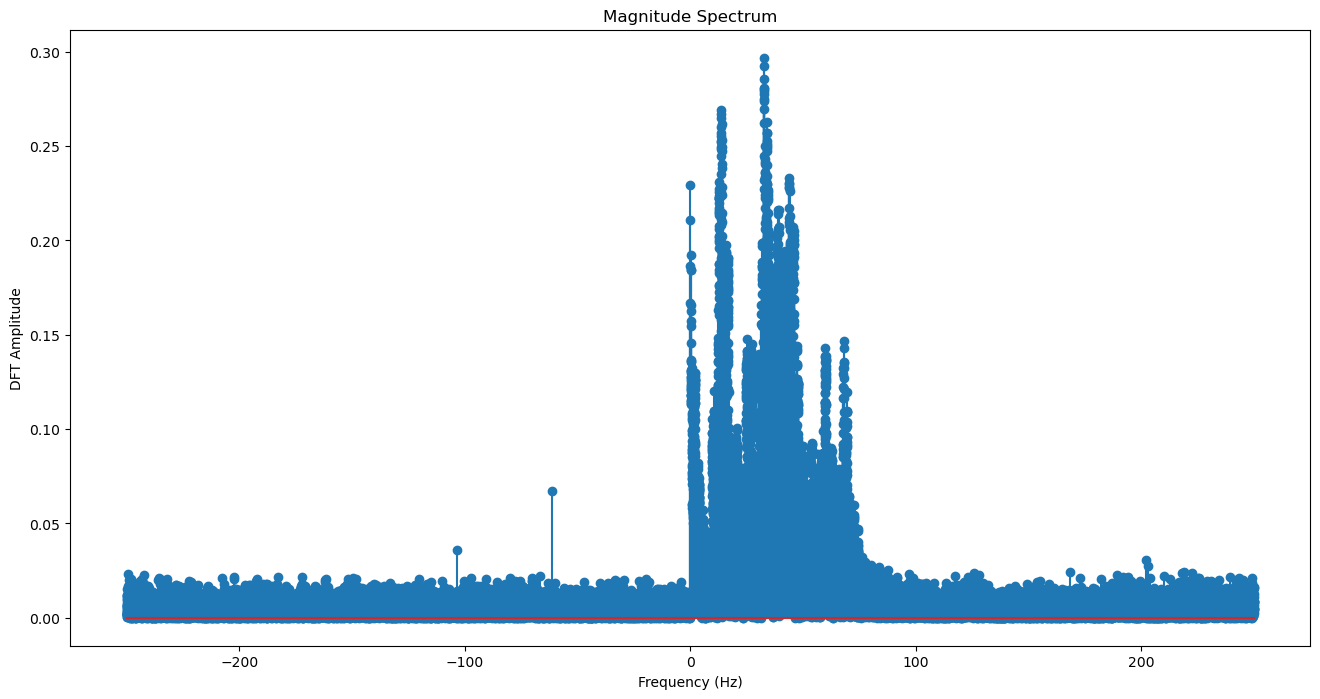

In [2]:
from Fourier import DiscreteFourierTransform

# the data set now is killing the kernel because it is too large 
dataset1_transform = DiscreteFourierTransform(dataset1_processed, sr)
dataset1_transform.DFT()
dataset1_transform.DFTplot()


In [3]:
sampling_range= len(dataset1_processed)

37500
[ 0.14239285+0.j         -0.13223517-0.28851786j  0.13410634+0.1586144j
 ... -0.12623515+0.0500003j   0.13410634-0.1586144j
 -0.13223517+0.28851786j]
37500
[ 0.          0.01333333  0.02666667 ... -0.04       -0.02666667
 -0.01333333]


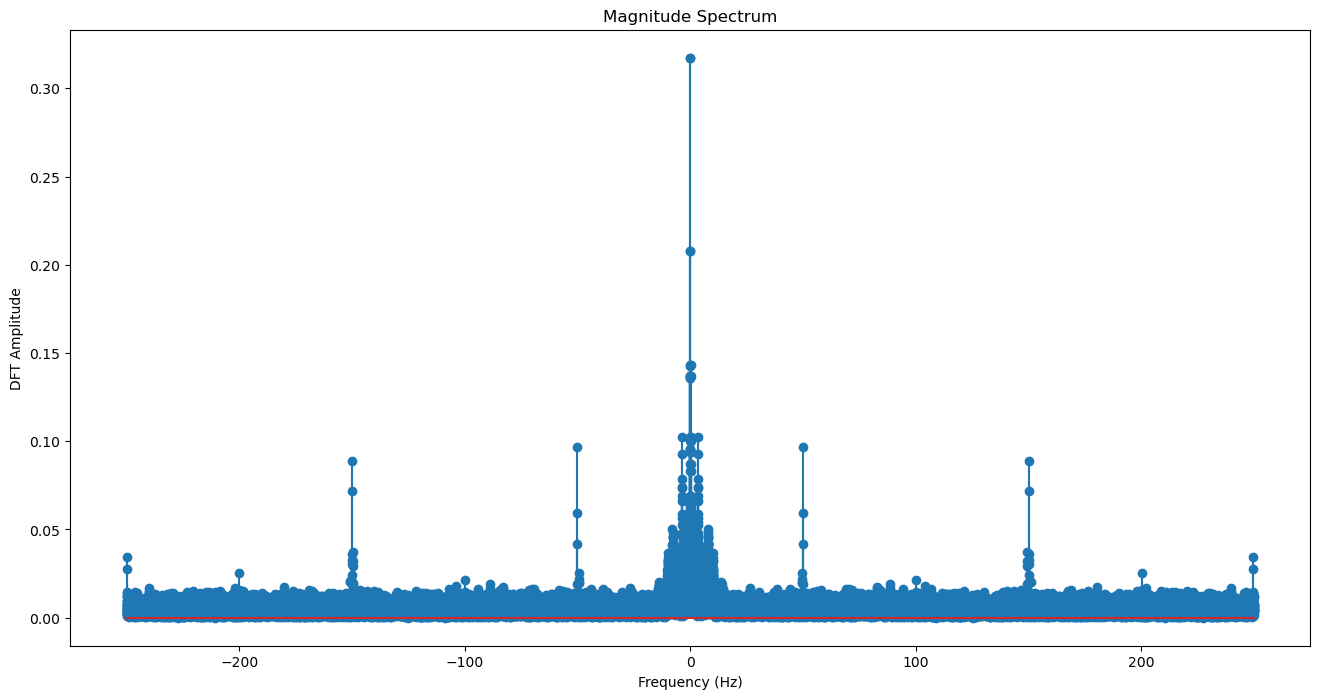

In [4]:
window_function = np.hanning(sampling_range)
#print(len(window_function))
dataset1_transform.apply_window(window_function*0.01, sampling_range)


37500
[ 0.13439386+0.j         -0.13428826-0.05594179j  0.12882697+0.12310059j
 ... -0.1126208 +0.12231605j  0.12882697-0.12310059j
 -0.13428826+0.05594179j]
37500
[ 0.          0.01333333  0.02666667 ... -0.04       -0.02666667
 -0.01333333]


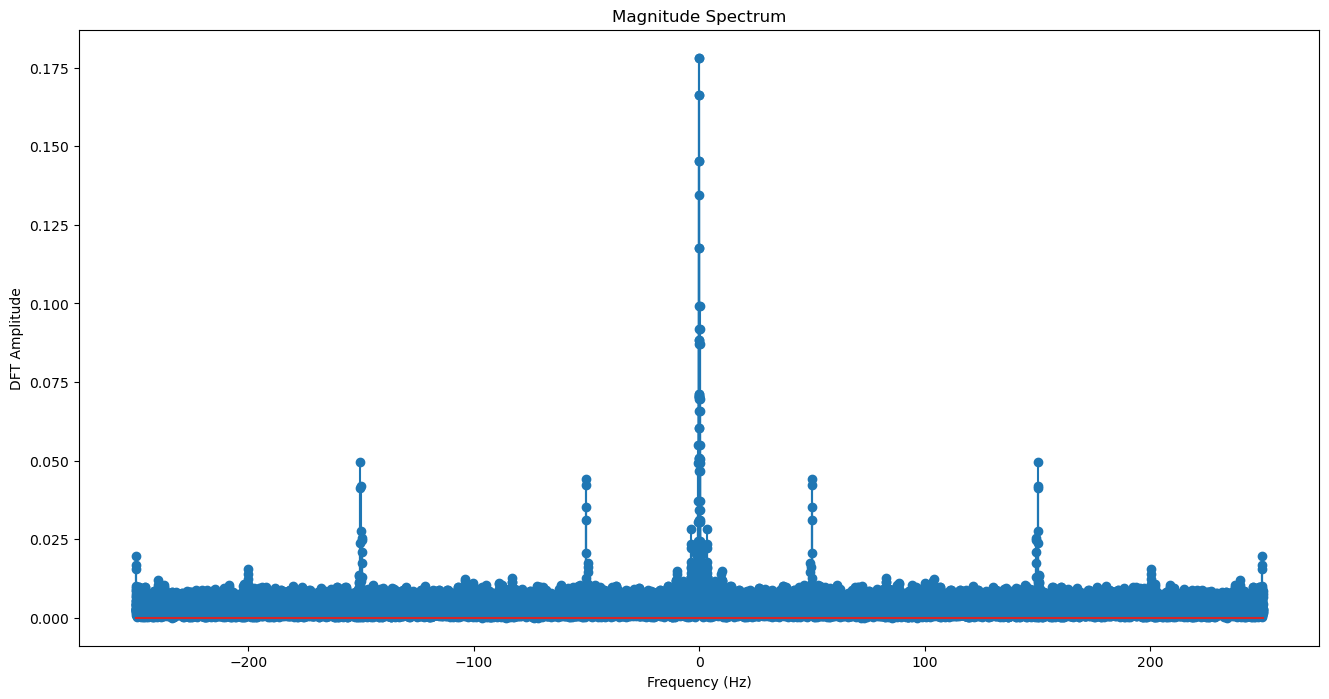

In [5]:
from scipy import signal
#print(len(window_function))

flattopwindow = signal.windows.flattop(sampling_range)
dataset1_transform.apply_window(flattopwindow*0.01, sampling_range)

In [6]:

dataset2 = loadmat('dataset2-moderate.mat')
print(dataset2)
dataset1_processed = np.array(dataset2['f0'])
#sample rate in hz
sr = int(dataset2['samplerate'][0].replace(' Hz', ''))

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Nov 15 10:38:16 2007', '__version__': '1.0', '__globals__': [], 'f0': array([[-0.01572379],
       [-0.01150711],
       [-0.00469555],
       ...,
       [ 0.13315742],
       [ 0.15424081],
       [ 0.13802281]]), 'dataset': array(['Simulated data from a moderate earthquake'], dtype='<U41'), 'samplerate': array(['500 Hz'], dtype='<U6'), 'info': array(['This is simulated data that has been adjusted for the structure in the South Wing lab'],
      dtype='<U85')}


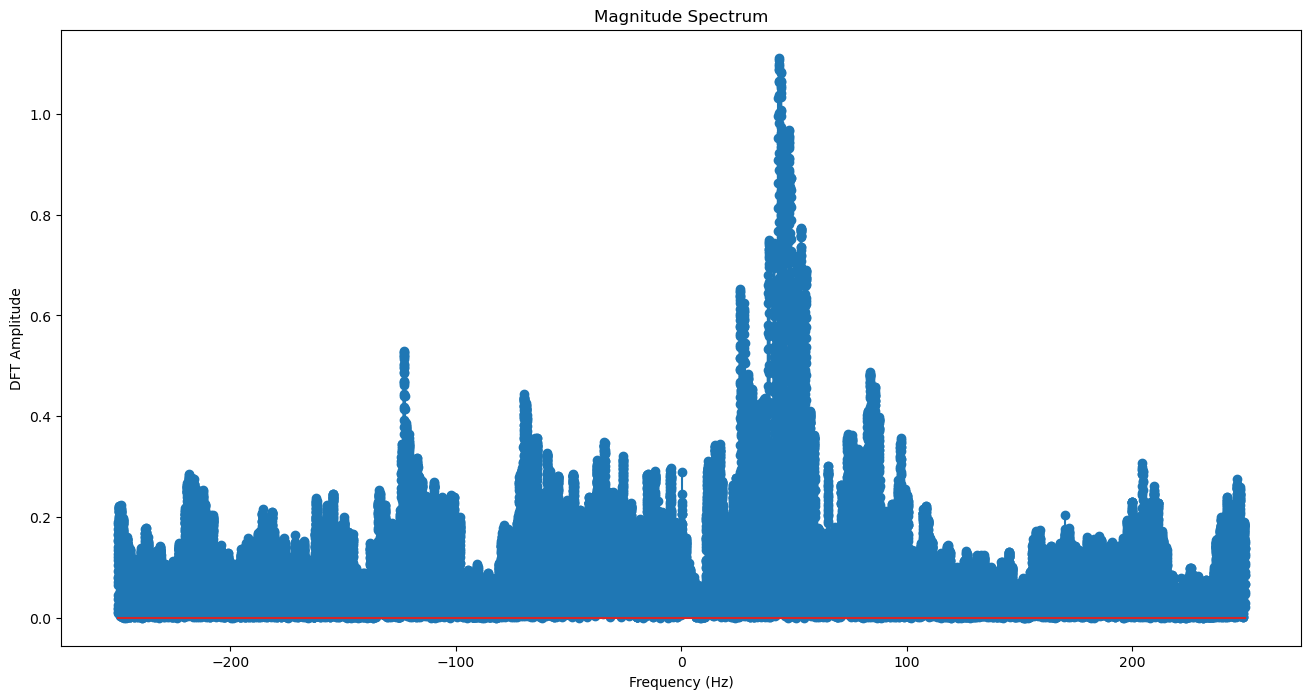

In [7]:
from Fourier import DiscreteFourierTransform

# the data set now is killing the kernel because it is too large 
dataset2_transform = DiscreteFourierTransform(dataset1_processed, sr)
dataset2_transform.DFT()
dataset2_transform.DFTplot()


37500
[ 0.47128198+0.j         -0.05153267-0.19145403j  0.01394547-0.1582163j
 ... -0.34266296+0.21963708j  0.01394547+0.1582163j
 -0.05153267+0.19145403j]
37500
[ 0.          0.01333333  0.02666667 ... -0.04       -0.02666667
 -0.01333333]


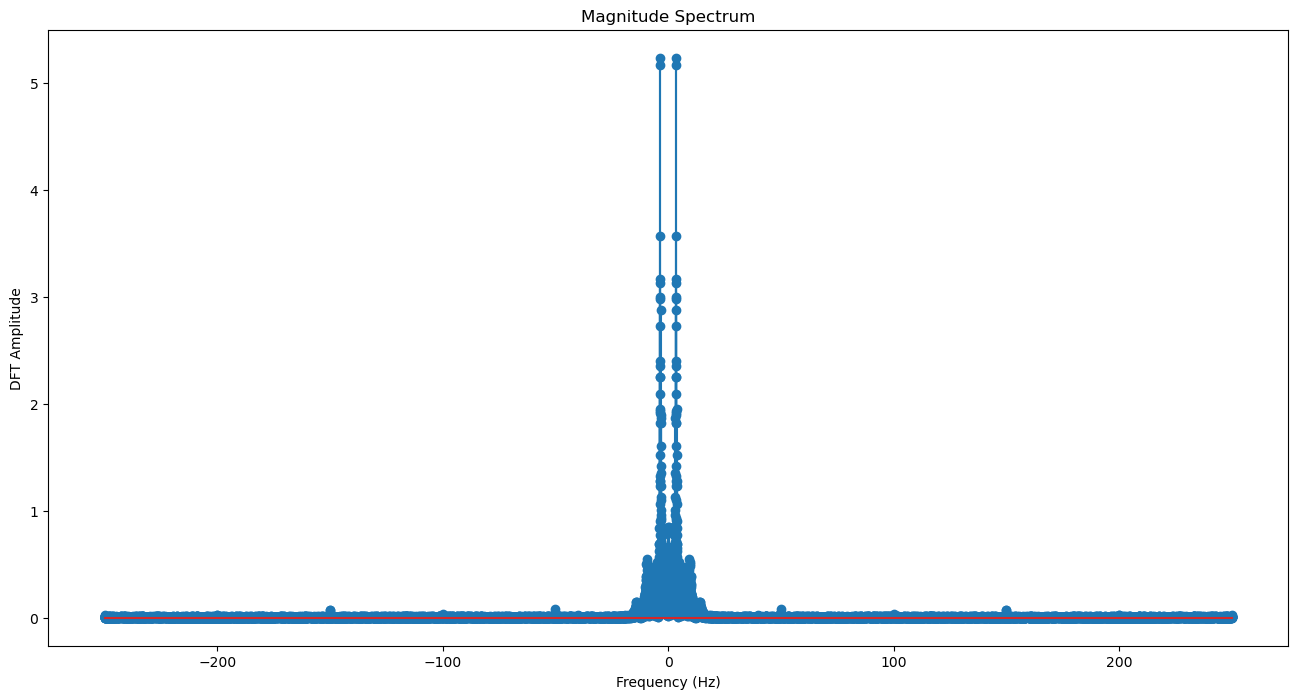

In [8]:
window_function = np.hanning(sampling_range)
#print(len(window_function))
dataset2_transform.apply_window(window_function*0.01, sampling_range)